In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

# Kernel Density

In [2]:
from sklearn.neighbors import KernelDensity

In [3]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

In [6]:
from scipy.stats.distributions import norm

# The grid we'll use for plotting
x_grid = np.linspace(-4.5, 3.5, 1000)

# Draw points from a bimodal distribution in 1D
np.random.seed(0)
x = np.concatenate([norm(-1, 1.).rvs(100),
                    norm(1, 0.3).rvs(100)])
pdf_true = (0.5 * norm(-1, 1).pdf(x_grid) +
            0.5 * norm(1, 0.3).pdf(x_grid))

(-4.5, 3.5)

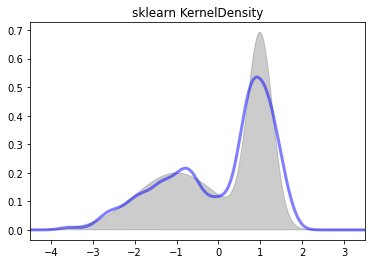

In [9]:
pdf = kde_sklearn(x, x_grid, bandwidth=0.224)
plt.plot(x_grid, pdf, color='blue', alpha=0.5, lw=3)
plt.fill(x_grid, pdf_true, ec='gray', fc='gray', alpha=0.4)
plt.title("sklearn KernelDensity")
plt.xlim(-4.5, 3.5)

In [8]:


from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(x[:, None])
print(grid.best_params_)



{'bandwidth': 0.22413793103448276}


## KDEpy

/home/dw/.local/lib/python3.8/site-packages/KDEpy/bw_selection.py:260: UserWarning: Silverman's rule currently ignores all weights
  warnings.warn("Silverman's rule currently ignores all weights")


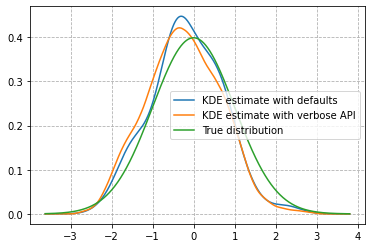

In [10]:
from KDEpy import FFTKDE
from scipy.stats import norm

# Generate a distribution and draw 2**6 data points
dist = norm(loc=0, scale=1)
data = dist.rvs(2**6)

# Compute kernel density estimate on a grid using Silverman's rule for bw
x, y1 = FFTKDE(bw="silverman").fit(data).evaluate(2**10)

# Compute a weighted estimate on the same grid, using verbose API
weights = np.arange(len(data)) + 1
estimator = FFTKDE(kernel='biweight', bw='silverman')
y2 = estimator.fit(data, weights=weights).evaluate(x)

plt.plot(x, y1, label='KDE estimate with defaults')
plt.plot(x, y2, label='KDE estimate with verbose API')
plt.plot(x, dist.pdf(x), label='True distribution')
plt.grid(True, ls='--', zorder=-15); plt.legend()


# Finding correlations

In [ ]:
from sklearn.preprocessing import StandardScaler

In [10]:
# trying to find correlations 
def create_data(m, max_steps):
    steps = list(range(10,10*max_steps+1,10))
    df = pd.DataFrame(steps, columns=['steps'])
    df['values'] = df['steps']*m
    df['rand'] = np.random.rand(len(df))
    
    return df

In [88]:
slope = 5
points = 10000
df = create_data(slope, points)

In [89]:
X = df["steps"].values
Y = (df["values"]*df["rand"]).values
X = X.reshape(X.shape[0],-1)
Y = Y#.reshape(Y.shape[0],-1)

In [90]:
def evaluate(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
    
    sc=StandardScaler()
    scaler = sc.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')

    mlp_reg.fit(X_train, Y_train)
    
    print("score:", mlp_reg.score(X_test, Y_test))
    
    return mlp_reg

In [91]:
mlp_reg = evaluate(X, Y)

/home/dw/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


score: 0.4268957925737028


### example from PySR

In [6]:
import pysr
from pysr import PySRRegressor

In [3]:
X = 2 * np.random.randn(100, 5)
y = 2.5382 * np.cos(X[:, 3]) + X[:, 0] ** 2 - 0.5

In [4]:
from pysr import PySRRegressor
model = PySRRegressor(
    model_selection="best",  # Result is mix of simplicity+accuracy
    niterations=40,
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
# ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    loss="loss(x, y) = (x - y)^2",
    # ^ Custom loss function (julia syntax)
)

In [8]:
model.fit(X, y)

/home/dw/.local/lib/python3.8/site-packages/pysr/sr.py:1539: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/dw/.local/lib/python3.8/site-packages/pysr/sr.py:1067: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


JuliaError: Exception 'LoadError: LoadError: LoadError: LoadError: syntax: invalid keyword argument syntax "Fs"
in expression starting at /home/dw/.julia/packages/SymbolicUtils/vnuIf/src/polyform.jl:96
in expression starting at /home/dw/.julia/packages/SymbolicUtils/vnuIf/src/SymbolicUtils.jl:49
in expression starting at /home/dw/.julia/packages/SymbolicRegression/nlE1i/src/InterfaceSymbolicUtils.jl:3
in expression starting at /home/dw/.julia/packages/SymbolicRegression/nlE1i/src/SymbolicRegression.jl:102' occurred while calling julia code:
using SymbolicRegression